# Importing Dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn

import missingno

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Acquiring Data

In [3]:
df_submission = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
df_submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [4]:
df_train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
df_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Describing Data

## Features available in dataset

In [6]:
df_train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

### All of the features are categorical

## Null values in data
No null values found in training set and test set

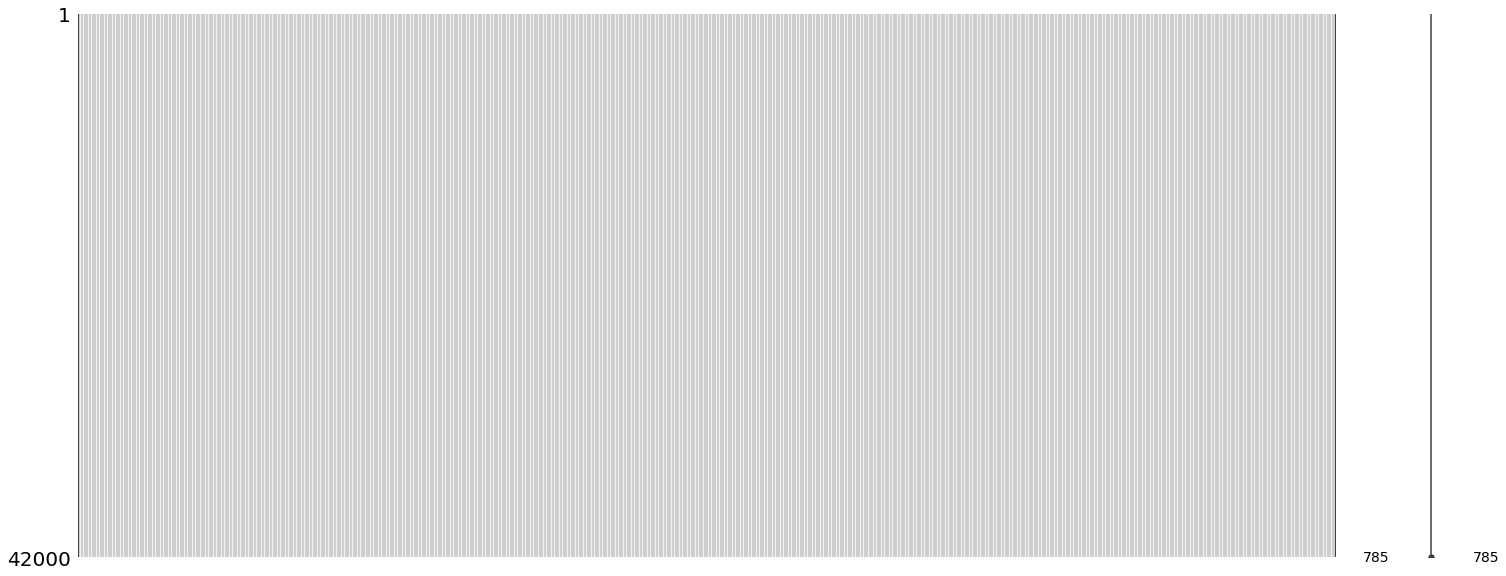

In [7]:
missingno.matrix(df_train)
plt.show()

In [8]:
df_train.isnull().sum().sum()

0

In [9]:
df_test.isnull().sum().sum()

0

# Model, Predict and Solve

In [10]:
X_train = df_train.drop("label",axis = 1)
Y_train = df_train["label"]
X_test = df_test

X_train.shape, Y_train.shape, X_test.shape

((42000, 784), (42000,), (28000, 784))

## Principal component analysis

In [11]:
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train.shape, Y_train.shape, X_test.shape

((42000, 10), (42000,), (28000, 10))

## Logistic Regression

In [12]:
regressor = LogisticRegression()
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)
regressor.score(X_train,Y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8025476190476191

## Support Vector Machine

In [13]:
regressor = SVC()
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)
regressor.score(X_train,Y_train)

0.9417380952380953

## Nearest Neighbors

In [14]:
regressor = KNeighborsClassifier(n_neighbors = 3)
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)
regressor.score(X_train,Y_train)

0.9585714285714285

## GaussianNB

In [15]:
regressor = GaussianNB()
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)
regressor.score(X_train,Y_train)

0.7701428571428571

## Perceptron

In [16]:
regressor = Perceptron()
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)
regressor.score(X_train,Y_train)

0.4768095238095238

## LinearSVC

In [17]:
regressor = LinearSVC()
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)
regressor.score(X_train,Y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5948571428571429

## Stochastic Gradient Descent

In [18]:
regressor = SGDClassifier()
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)
regressor.score(X_train,Y_train)

0.757452380952381

## Decision Tree

In [19]:
regressor = DecisionTreeClassifier()
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)
regressor.score(X_train,Y_train)

1.0

## Random Forest

In [20]:
regressor = RandomForestClassifier(n_estimators=100)
regressor.fit(X_train,Y_train)
Y_pred = regressor.predict(X_test)
regressor.score(X_train,Y_train)

1.0

In [22]:
submission = pd.DataFrame({
        "Imageid": df_test.index,
        "Label": Y_pred
    })
submission.head()

AttributeError: 'DataFrame' object has no attribute 'id'